In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
df = pd.read_csv('tabu_search_r0.csv', sep=",|-", engine='python')
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,type,fitness
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,init,724005.0
1,0,0,0,0,300,0,0,0,0,0,0,0,0,0,calc,723758.0
2,0,0,300,0,0,0,0,0,0,0,0,0,0,0,calc,737592.0
3,300,0,0,0,0,0,0,0,0,0,0,0,0,0,calc,738725.0
4,0,0,0,300,0,0,0,0,0,0,0,0,0,0,calc,728750.0


In [40]:
df_step = df[df['type']=='step'].copy().reset_index(drop=True)
# print(df_step.columns)
df_step.tail()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,type,fitness
41,300,600,0,0,0,0,900,2400,1500,1500,900,300,0,0,step,678831.0
42,300,600,0,0,0,0,900,2400,1500,1500,900,300,0,0,step,678831.0
43,300,600,0,0,0,0,900,2400,1500,1500,900,300,0,0,step,678831.0
44,300,600,0,0,0,0,900,2400,1500,1500,900,300,0,0,step,678831.0
45,300,600,0,0,0,0,900,2400,1500,1500,900,300,0,0,step,678831.0


Text(0, 0.5, 'departure_time')

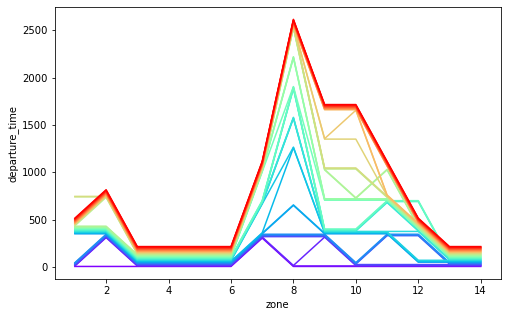

In [35]:
from matplotlib.pyplot import cm

fig, ax = plt.subplots(figsize=(8,5))
color=iter(cm.rainbow(np.linspace(0,1,df_step.shape[0])))

i=0
for step in df_step.itertuples():
   c=next(color)
   i+=1
   ax.plot(list(range(1, 15)), [getattr(step, '_{}'.format(zone))+i*5 for zone in range(1, 15)], c=c)
ax.set_xlabel('zone')
ax.set_ylabel('departure_time')


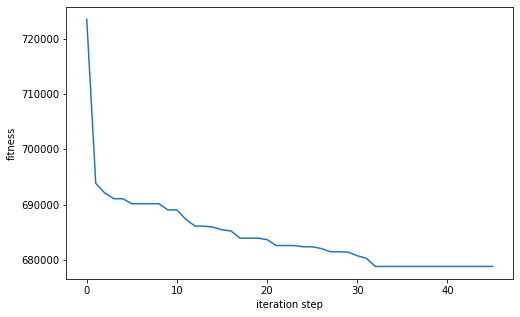

In [41]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(df_step.index, df_step['fitness'])
ax.set_xlabel('iteration step')
ax.set_ylabel('fitness')
plt.show()

In [28]:
od = pd.read_csv('projects/butte_osmnx/demand_inputs/ctm_od_virtual.csv')
od.head()

,APN,origin_osmid,destin_osmid,evac_zone,v_id,dept_time_scen_1,dept_time_scen_2,dept_time_scen_3
0,053-161-066-000,86532495,vsink_chico,6,0,0,9420,5500
1,053-161-066-000,86532495,vsink_chico,6,1,0,9420,5500
2,055-190-055-000,86454823,vsink_chico,12,0,0,21720,9514
3,055-190-055-000,86454823,vsink_chico,12,1,0,21720,9514
4,055-130-064-000,86454823,vsink_oroville,11,0,0,21720,5661


In [29]:
print(od.groupby('evac_zone').size().to_frame('veh_cnts_per_zone'))

veh_cnts_per_zone
evac_zone                   
1                       2122
2                       1972
3                       1734
4                       2406
5                       1356
6                       1482
7                       2062
8                        846
9                        994
10                      1136
11                      1294
12                       238
13                      1176
14                      1324
